In [1]:
library(ggplot2)
library(plyr)
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
auto_mobiles <- read.csv("datasets/auto_mobiles_processed.csv", header=TRUE)

head(auto_mobiles, 10)

,normalized_losses,fuel_type,aspiration,number_of_doors,drive_wheels,engine_location,wheel_base,length,width,height,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,...,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,168,gas,std,two,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
2,168,gas,std,two,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
3,168,gas,std,two,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
4,164,gas,std,four,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
5,164,gas,std,four,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,161,gas,std,two,fwd,front,99.8,177.3,66.3,53.1,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
7,158,gas,std,four,fwd,front,105.8,192.7,71.4,55.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,168,gas,std,four,fwd,front,105.8,192.7,71.4,55.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
9,158,gas,turbo,four,fwd,front,105.8,192.7,71.4,55.9,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875


In [3]:
table(auto_mobiles$fuel_type)


diesel    gas 
    19    168 

In [4]:
options(repr.plot.width=6, repr.plot.height=3.5)

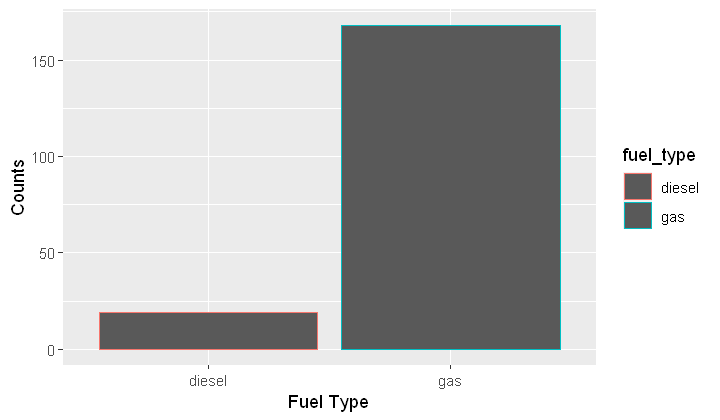

In [7]:
ggplot(data=auto_mobiles,
aes(factor(x=fuel_type), col=fuel_type)) + geom_bar() + xlab("Fuel Type") + ylab("Counts")

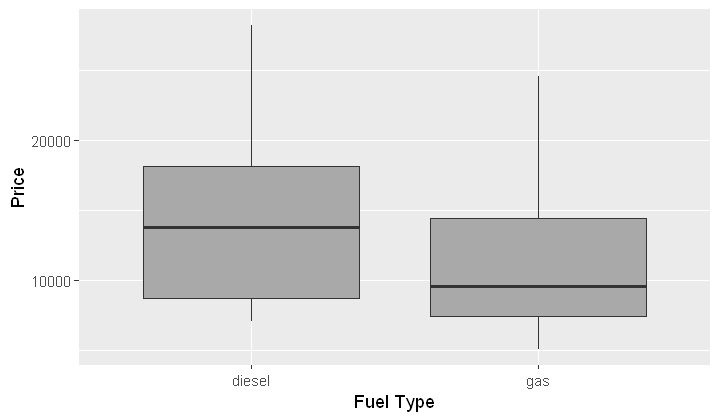

In [8]:
qplot(factor(x=fuel_type), y=price, geom = "boxplot", data = auto_mobiles, xlab="Fuel Type", ylab = "Price", fill = I("#a9a9a9"))

In [11]:
model_data <- ddply(auto_mobiles,
~factor(fuel_type),
summarize,
group_size = length(price),
price_mean = mean(price),
price_std = sd(price),
std_error_price = price_std / sqrt(group_size))

model_data

factor(fuel_type),group_size,price_mean,price_std,std_error_price
<fct>,<int>,<dbl>,<dbl>,<dbl>
diesel,19,15008.58,7002.289,1606.4352
gas,168,11106.73,4557.894,351.6492


In [12]:
wilcox.test <- wilcox.test(auto_mobiles$price ~ auto_mobiles$fuel_type, data = auto_mobiles, conf.int=TRUE)

wilcox.test


	Wilcoxon rank sum test with continuity correction

data:  auto_mobiles$price by auto_mobiles$fuel_type
W = 2146, p-value = 0.014
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
  503 6236
sample estimates:
difference in location 
              2807.712 


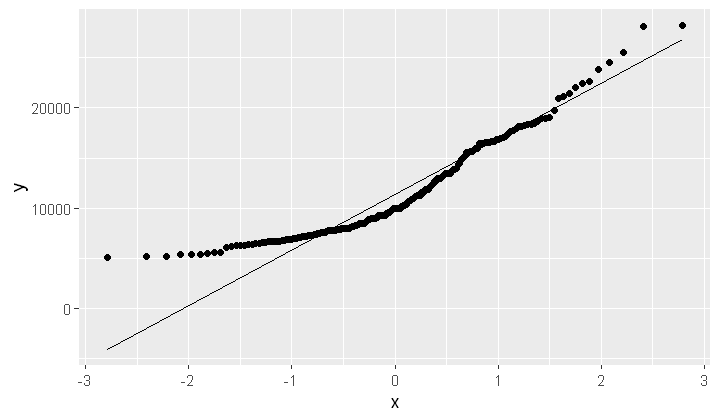

In [14]:
plot <- ggplot(data = auto_mobiles, aes(sample = price))

plot + stat_qq() + stat_qq_line()

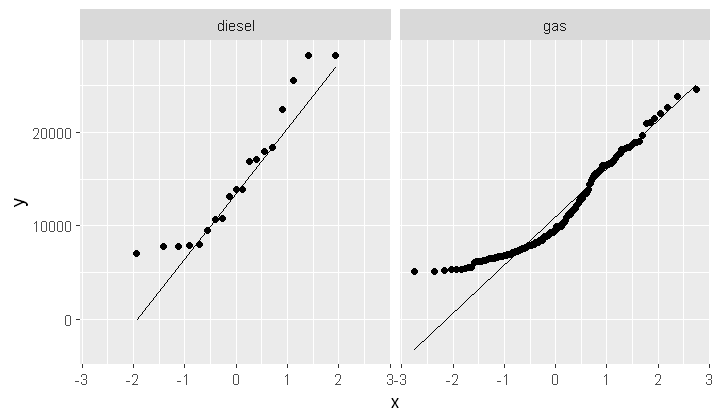

In [18]:
plot + stat_qq() + stat_qq_line() + facet_grid(. ~ fuel_type)

In [19]:
#install.packages("r_conda")

Installing package into 'C:/Users/natha/Documents/R/win-library/4.1'
(as 'lib' is unspecified)

Warning message:
"package 'r_conda' is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"


In [20]:
library(car)

Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode




In [21]:
leveneTest(price ~ fuel_type, data = auto_mobiles)

Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,6.037873,0.01492378
,185,NA,NA


In [23]:
t_tests <- t.test(price ~ factor(fuel_type), data = auto_mobiles, alternative = "two.sided")

t_tests


	Welch Two Sample t-test

data:  price by factor(fuel_type)
t = 2.3727, df = 19.761, p-value = 0.02793
alternative hypothesis: true difference in means between group diesel and group gas is not equal to 0
95 percent confidence interval:
  468.880 7334.814
sample estimates:
mean in group diesel    mean in group gas 
            15008.58             11106.73 
